In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import os

# Ignore warnings
warnings.filterwarnings('ignore')

# Function to read and show data
def load_and_show_data(input_file):
    # Read raw data from file (assuming 'raw_data' folder is one level up)
    data = pd.read_csv(f'../raw_data/{input_file}')
    
    # Show data info
    print(f"Showing data for {input_file}")
    print(data.head())  # Display first few rows for quick review
    print(data.info())  # Show summary info of the data
    
    # Check and drop null values if any
    data = check_and_drop_nulls(data)
    
    return data

# Function to remove unwanted columns (Dividends and Stock Splits)
def clean_data(input_file):
    # Read raw data
    data = pd.read_csv(f'../raw_data/{input_file}')
    
    # Remove unwanted columns (Dividends and Stock Splits)
    cleaned_data = data.drop(columns=['Dividends', 'Stock Splits'])
    
    # Check and drop null values if any
    cleaned_data = check_and_drop_nulls(cleaned_data)
    
    # Save cleaned data to a new CSV file (clean_data folder outside main_code)
    clean_file_path = Path(f'../clean_data/clean_{input_file}')  # Adjust path to save outside 'main_code'
    clean_file_path.parent.mkdir(parents=True, exist_ok=True)  # Create parent directory if it doesn't exist
    cleaned_data.to_csv(clean_file_path, index=False)
    print(f"Cleaned data saved to {clean_file_path}")
    
    return cleaned_data

# Function to plot the stock data
def plot_stock_data(input_file):
    # Load cleaned data
    cleaned_data = pd.read_csv(f'../clean_data/clean_{input_file}')
    
    # Ensure the 'Date' column is parsed as a datetime type if it exists
    cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
    
    # Set the 'Date' column as the index
    cleaned_data.set_index('Date', inplace=True)
    
    # Check and drop null values if any
    cleaned_data = check_and_drop_nulls(cleaned_data)
    
    # Plot the stock data
    cleaned_data[['Open', 'Close', 'High', 'Low']].iloc[::-1].plot(figsize=(28, 8))
    
    # Set the labels and title
    plt.ylabel('Đô la Mỹ', fontsize=25)
    plt.title(f"Giá cổ phiếu {input_file.split('.')[0]} cho toàn bộ thời gian", fontsize=35)
    
    # Display the plot
    plt.show()

# Function to check and drop rows with null values
def check_and_drop_nulls(data):
    print("Checking for null values...")
    
    # Show columns with null values
    null_data = data.isnull().sum()
    print("Null values in each column:\n", null_data)
    
    # Drop rows with null values
    data_cleaned = data.dropna()  # You can also use data.fillna() to fill nulls instead of dropping
    
    # If you want to fill nulls with specific value (e.g., 0), use:
    # data_cleaned = data.fillna(0)
    
    print(f"Rows before dropping nulls: {len(data)}")
    print(f"Rows after dropping nulls: {len(data_cleaned)}")
    
    return data_cleaned


In [5]:
# List of stock tickers
tickers = ["AMZN", "AAPL", "NVDA", "MSFT", "GOOG", "META", "TSLA", "WMT", "JPM", "NFLX"]

In [6]:
# Step 1: Load and show all data for the tickers
for ticker in tickers:
    load_and_show_data(f"data{ticker}.csv")

Showing data for dataAMZN.csv
                        Date       Open       High        Low      Close  \
0  2016-01-04 00:00:00-05:00  32.814499  32.886002  31.375500  31.849501   
1  2016-01-05 00:00:00-05:00  32.342999  32.345501  31.382500  31.689501   
2  2016-01-06 00:00:00-05:00  31.100000  31.989500  31.015499  31.632500   
3  2016-01-07 00:00:00-05:00  31.090000  31.500000  30.260500  30.396999   
4  2016-01-08 00:00:00-05:00  30.983000  31.207001  30.299999  30.352501   

      Volume  Dividends  Stock Splits  
0  186290000        0.0           0.0  
1  116452000        0.0           0.0  
2  106584000        0.0           0.0  
3  141498000        0.0           0.0  
4  110258000        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2243 non-null   object 
 1   Open          2243 non-null   flo

In [7]:
# Step 2: Clean all data and save it

for ticker in tickers:
    clean_data(f"data{ticker}.csv")

Cleaned data saved to ..\clean_data\clean_dataAMZN.csv
Cleaned data saved to ..\clean_data\clean_dataAAPL.csv
Cleaned data saved to ..\clean_data\clean_dataNVDA.csv
Cleaned data saved to ..\clean_data\clean_dataMSFT.csv
Cleaned data saved to ..\clean_data\clean_dataGOOG.csv
Cleaned data saved to ..\clean_data\clean_dataMETA.csv
Cleaned data saved to ..\clean_data\clean_dataTSLA.csv
Cleaned data saved to ..\clean_data\clean_dataWMT.csv
Cleaned data saved to ..\clean_data\clean_dataJPM.csv
Cleaned data saved to ..\clean_data\clean_dataNFLX.csv


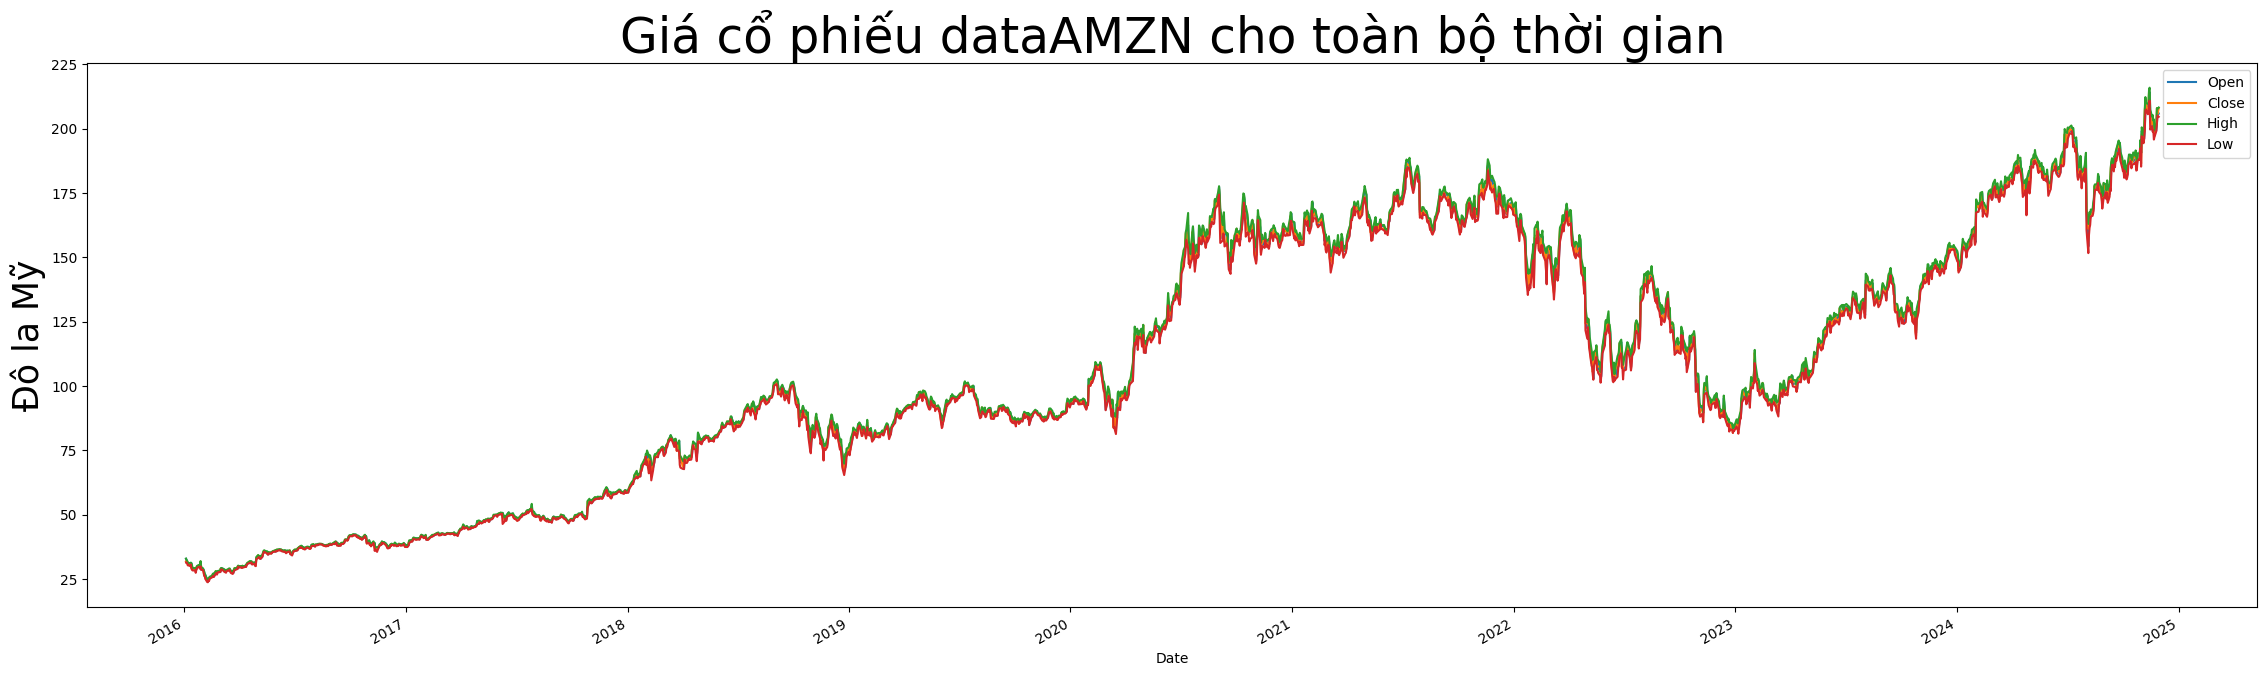

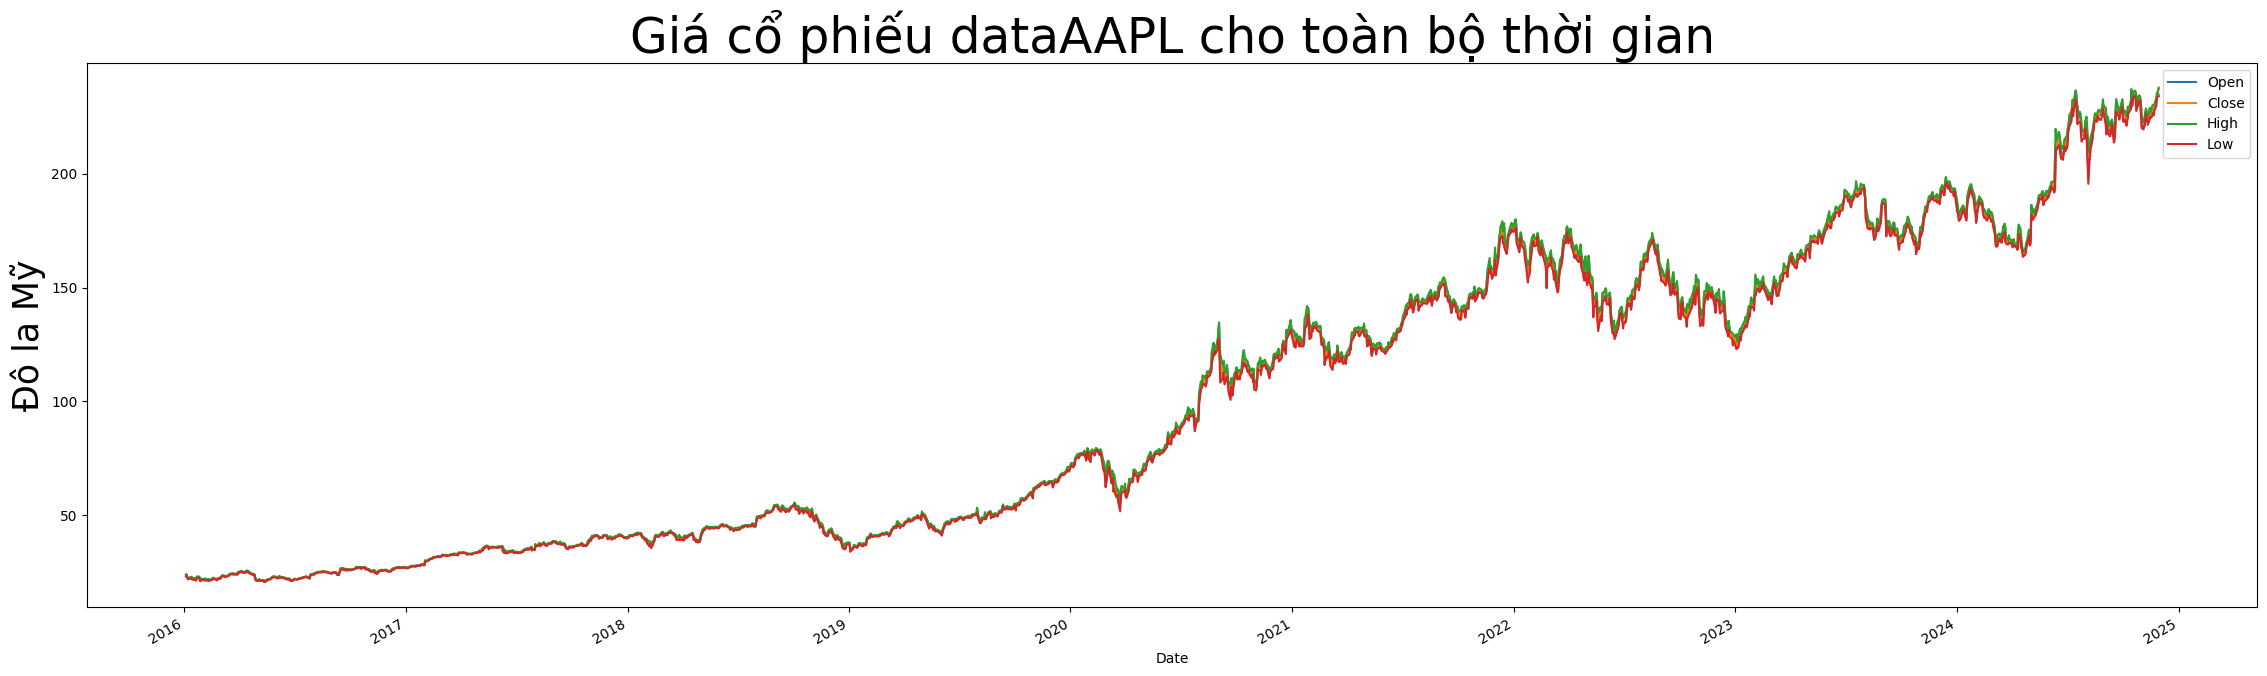

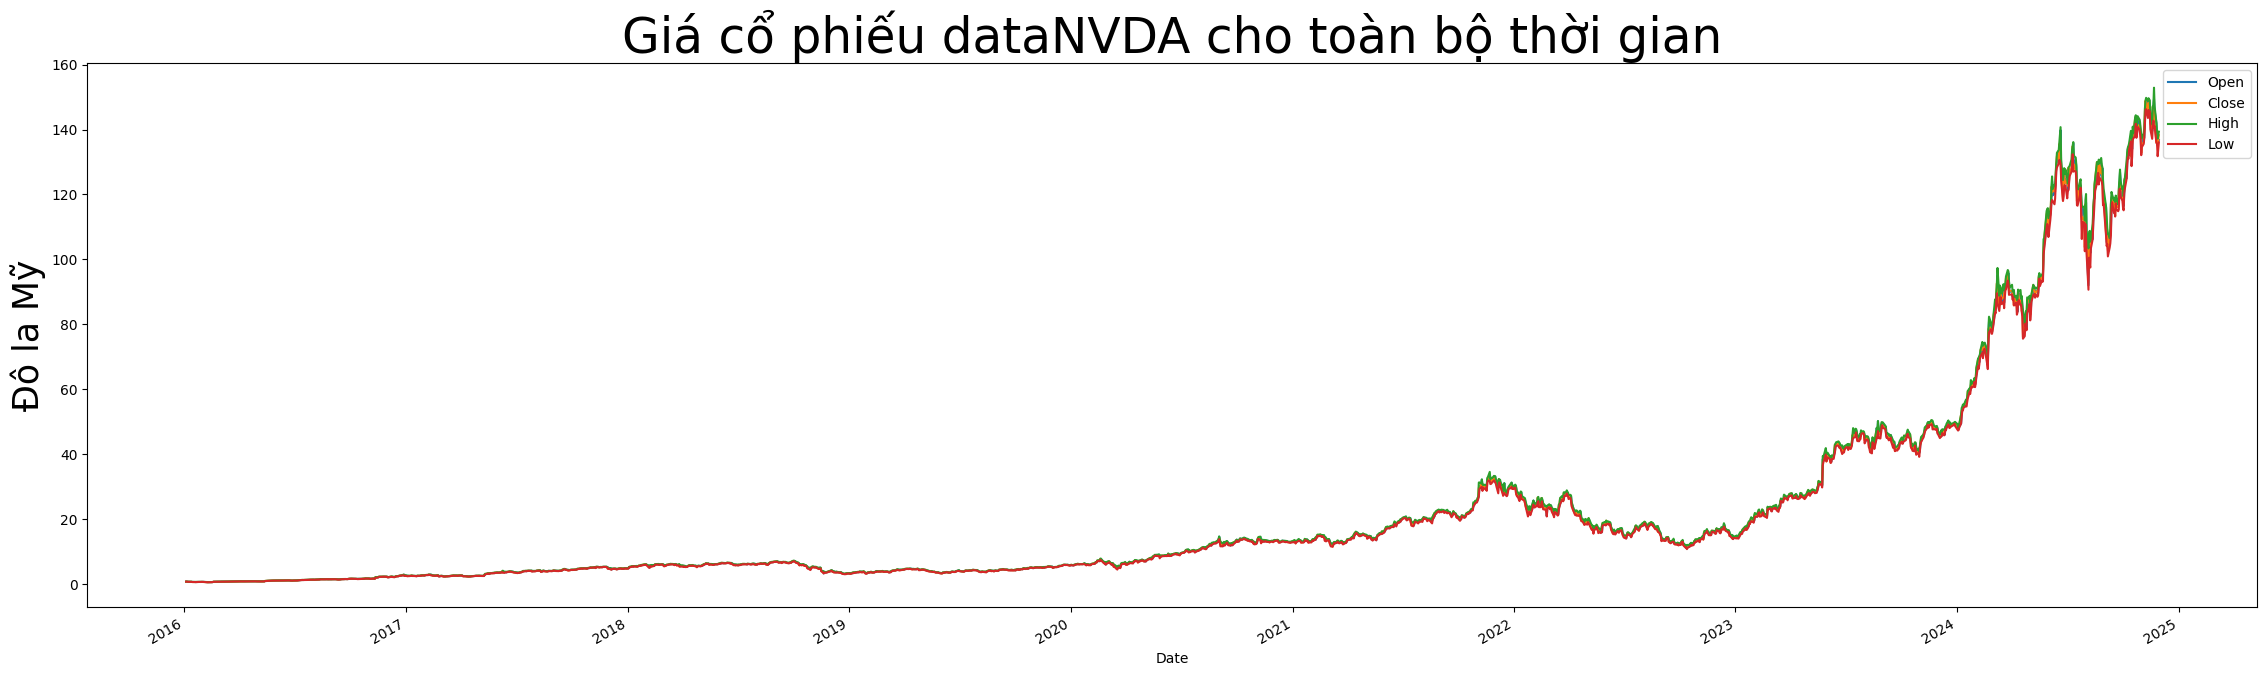

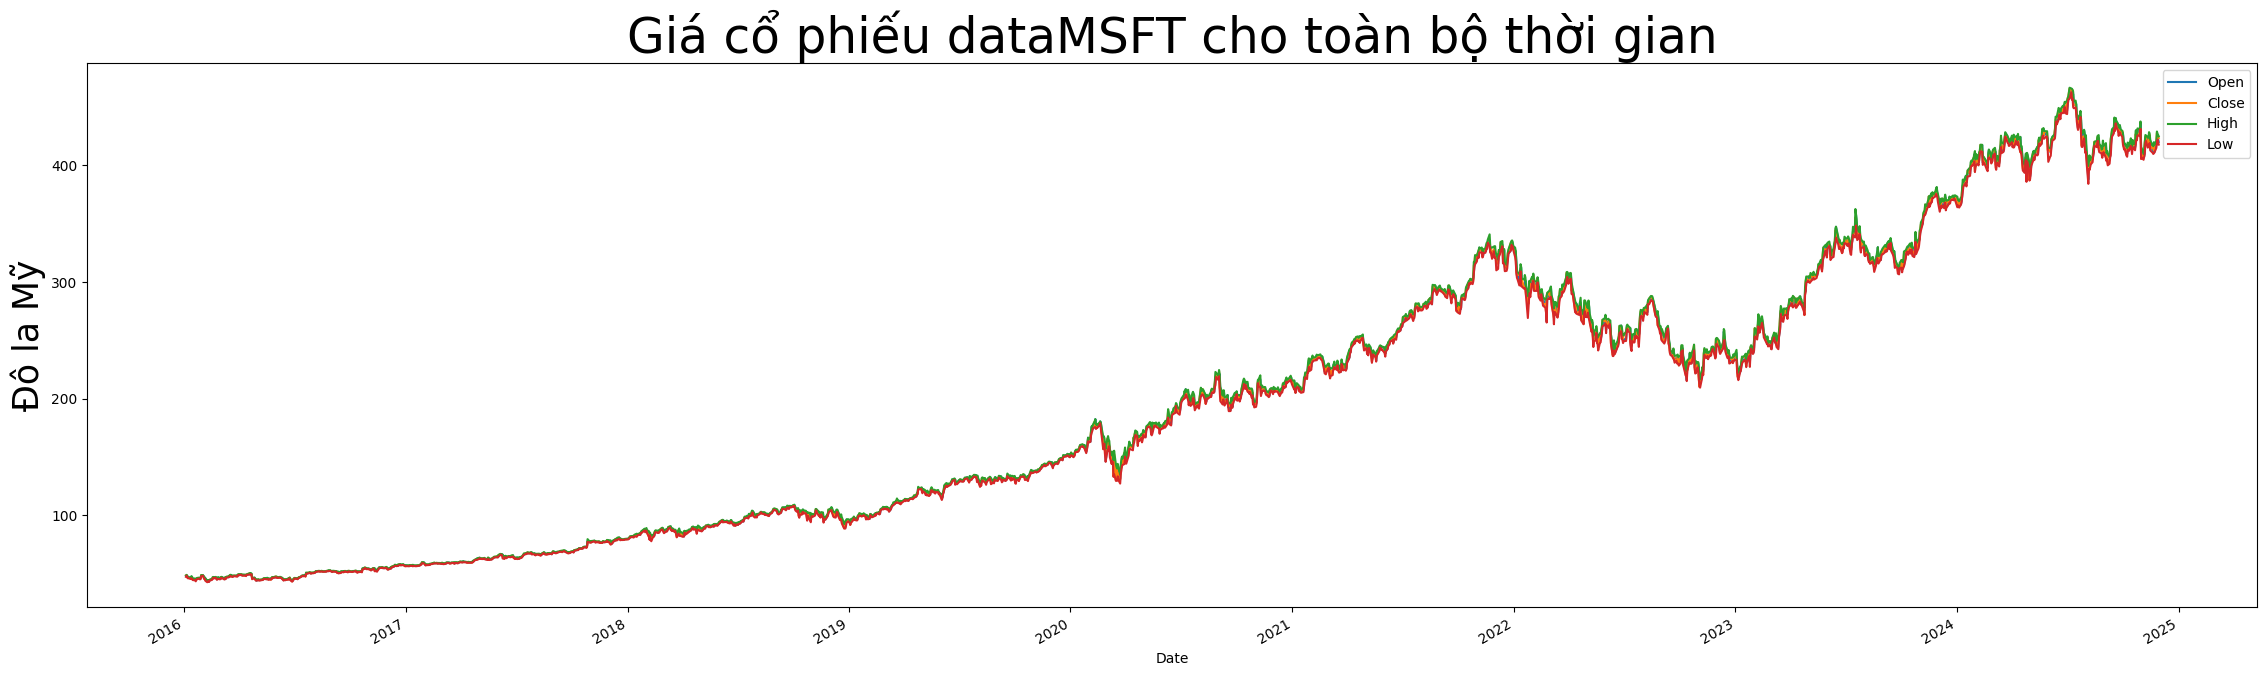

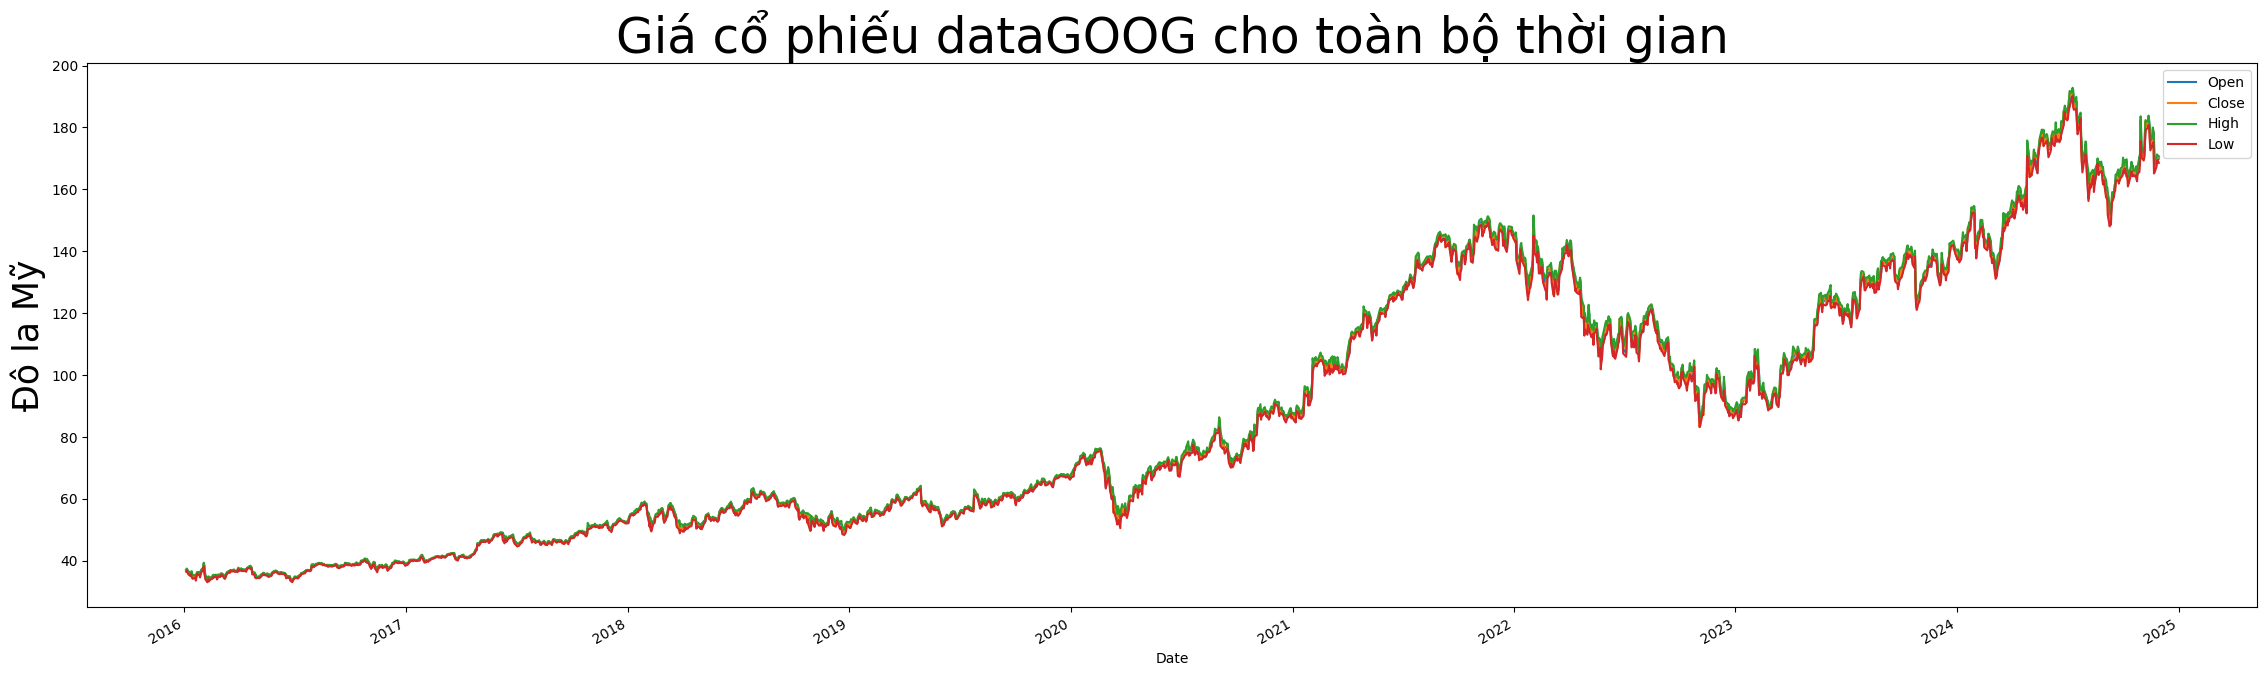

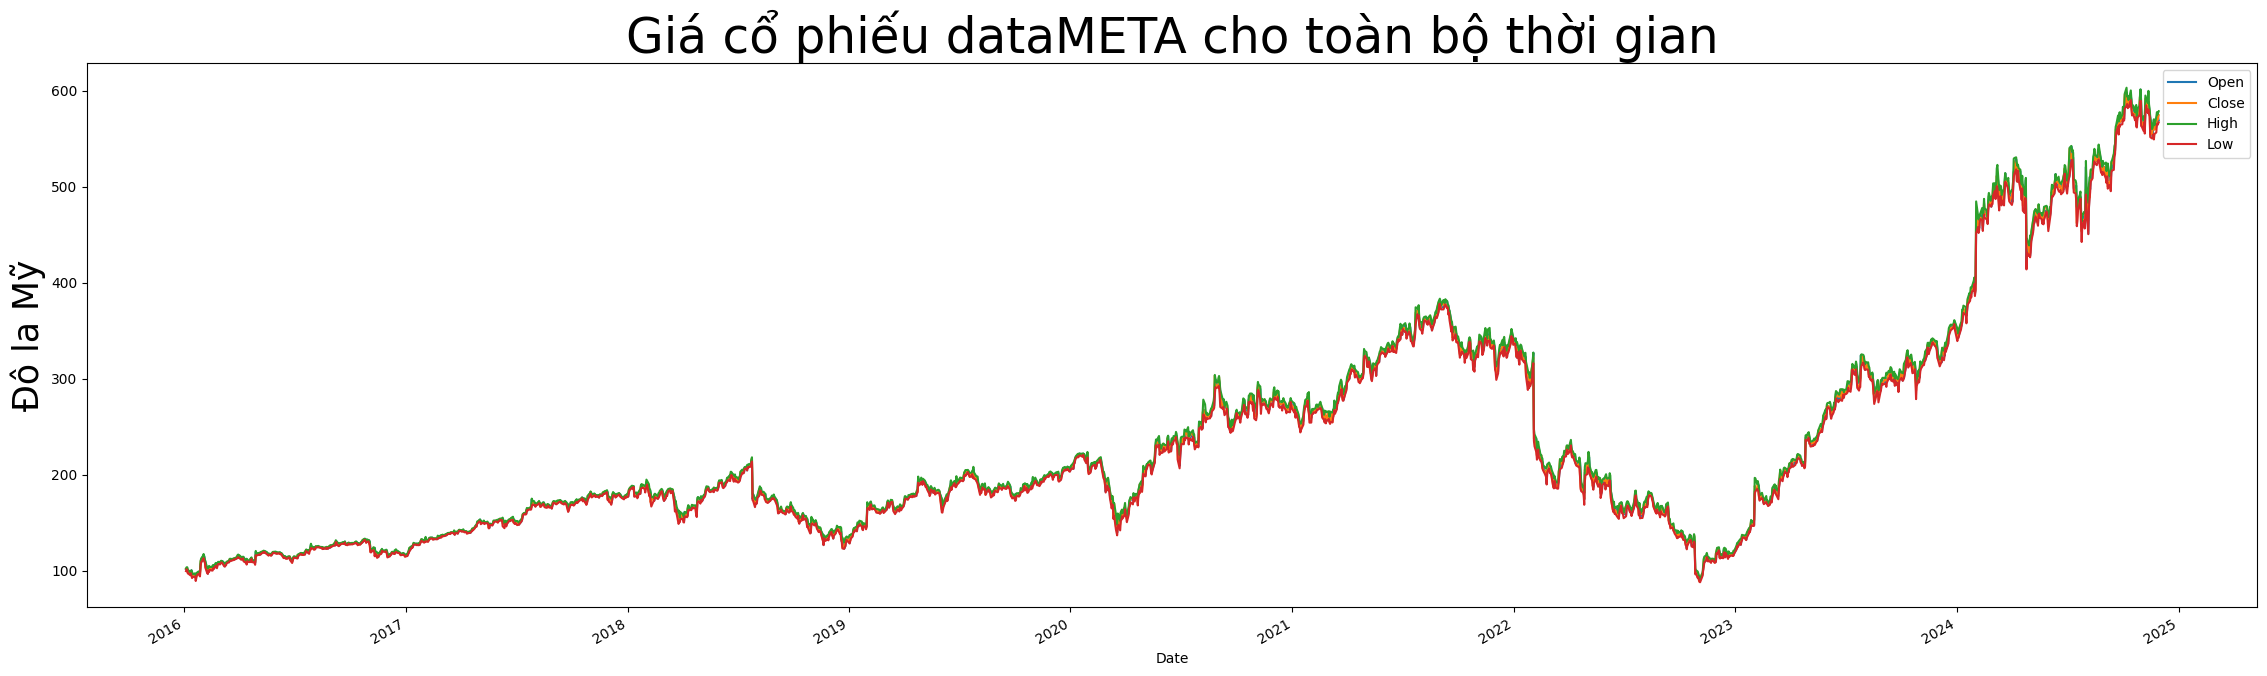

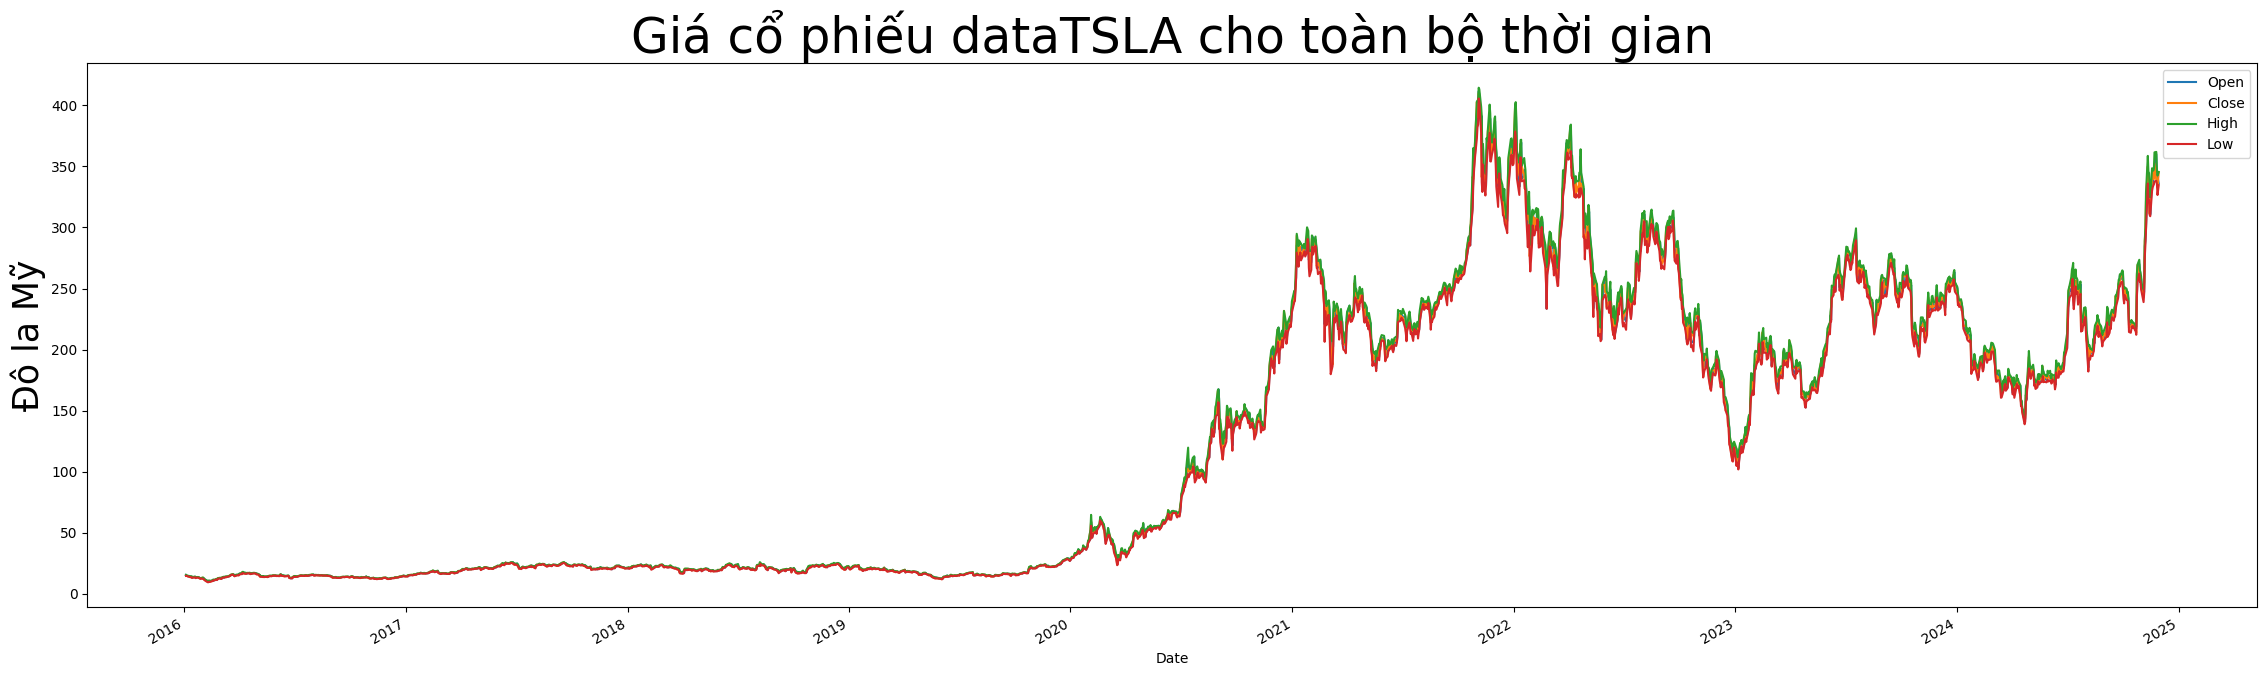

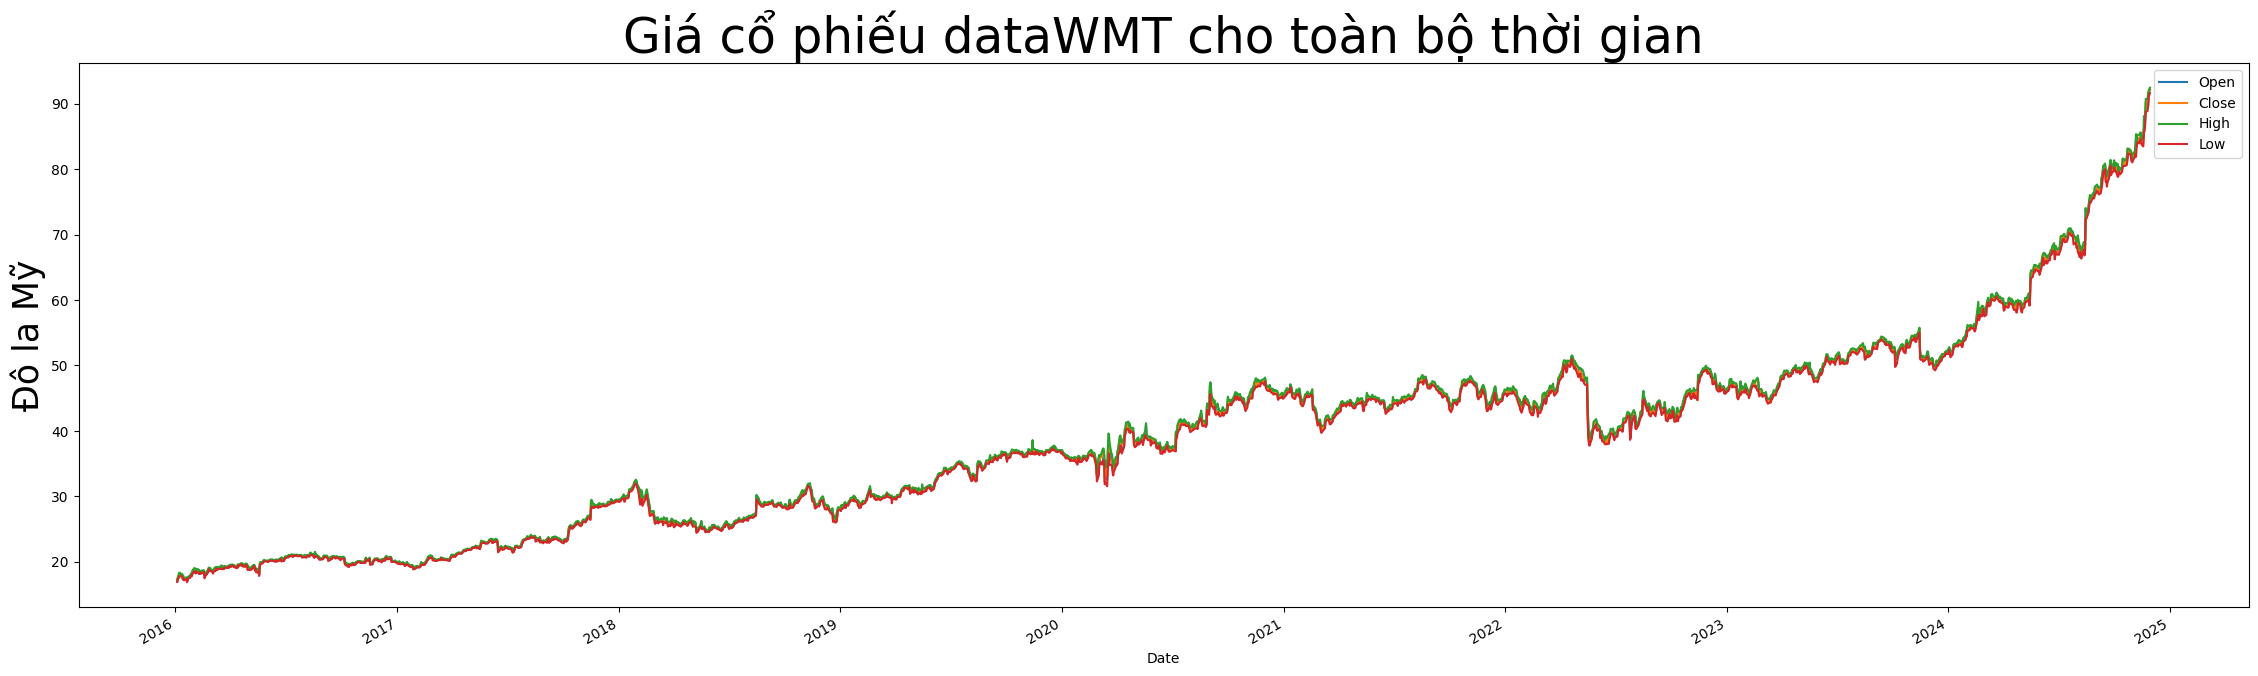

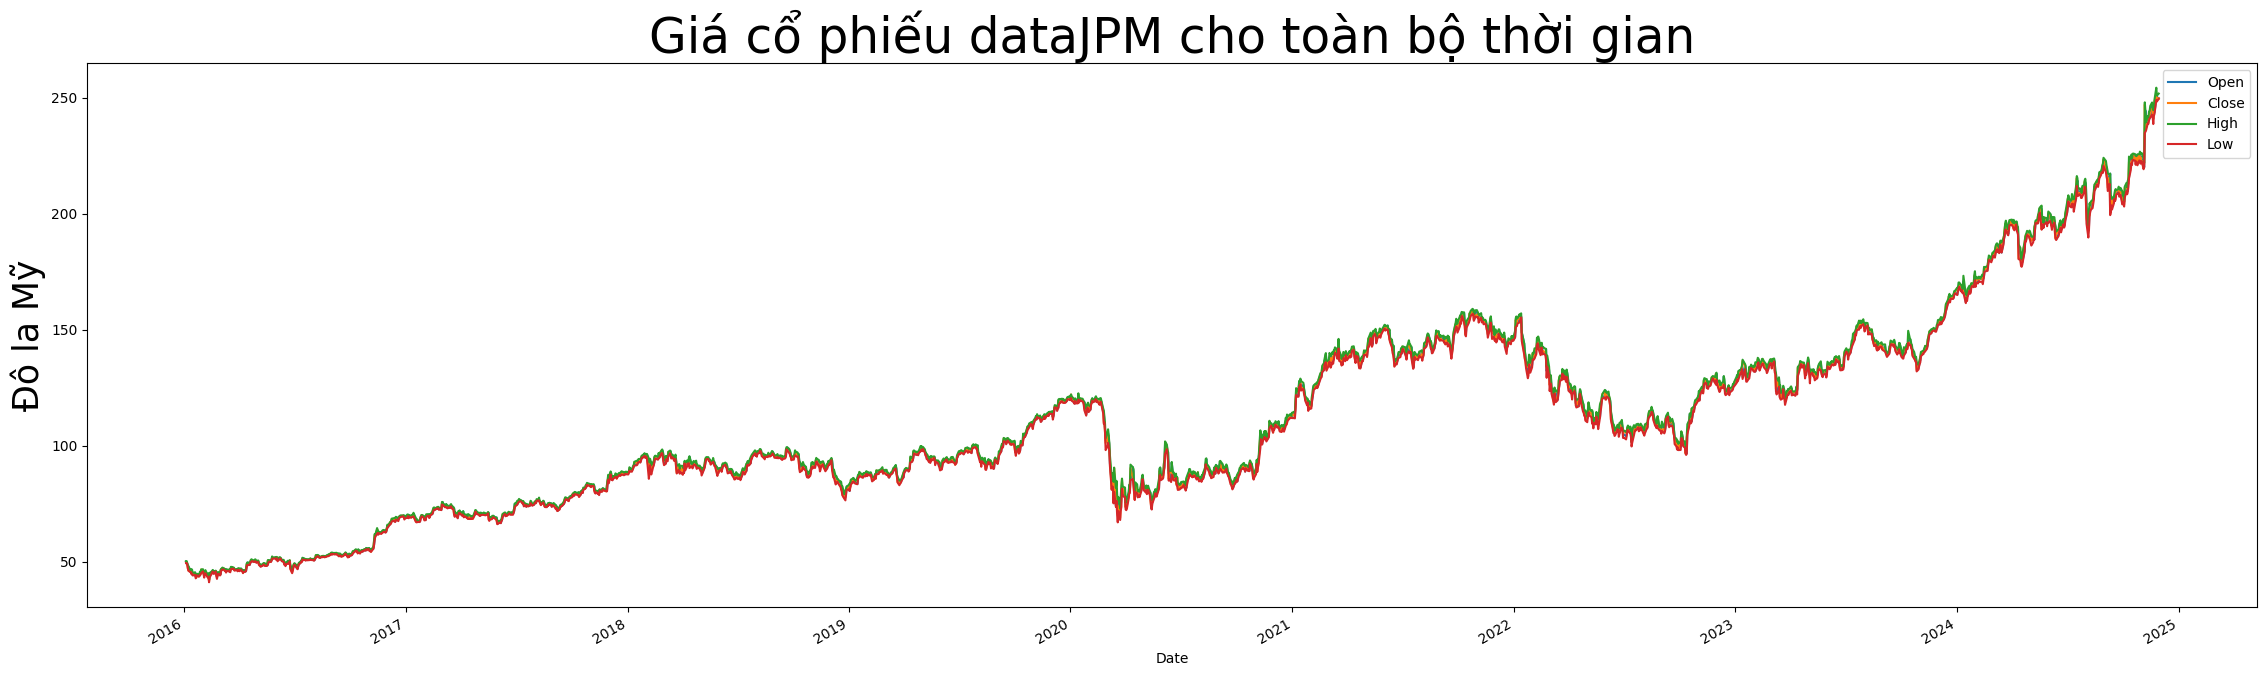

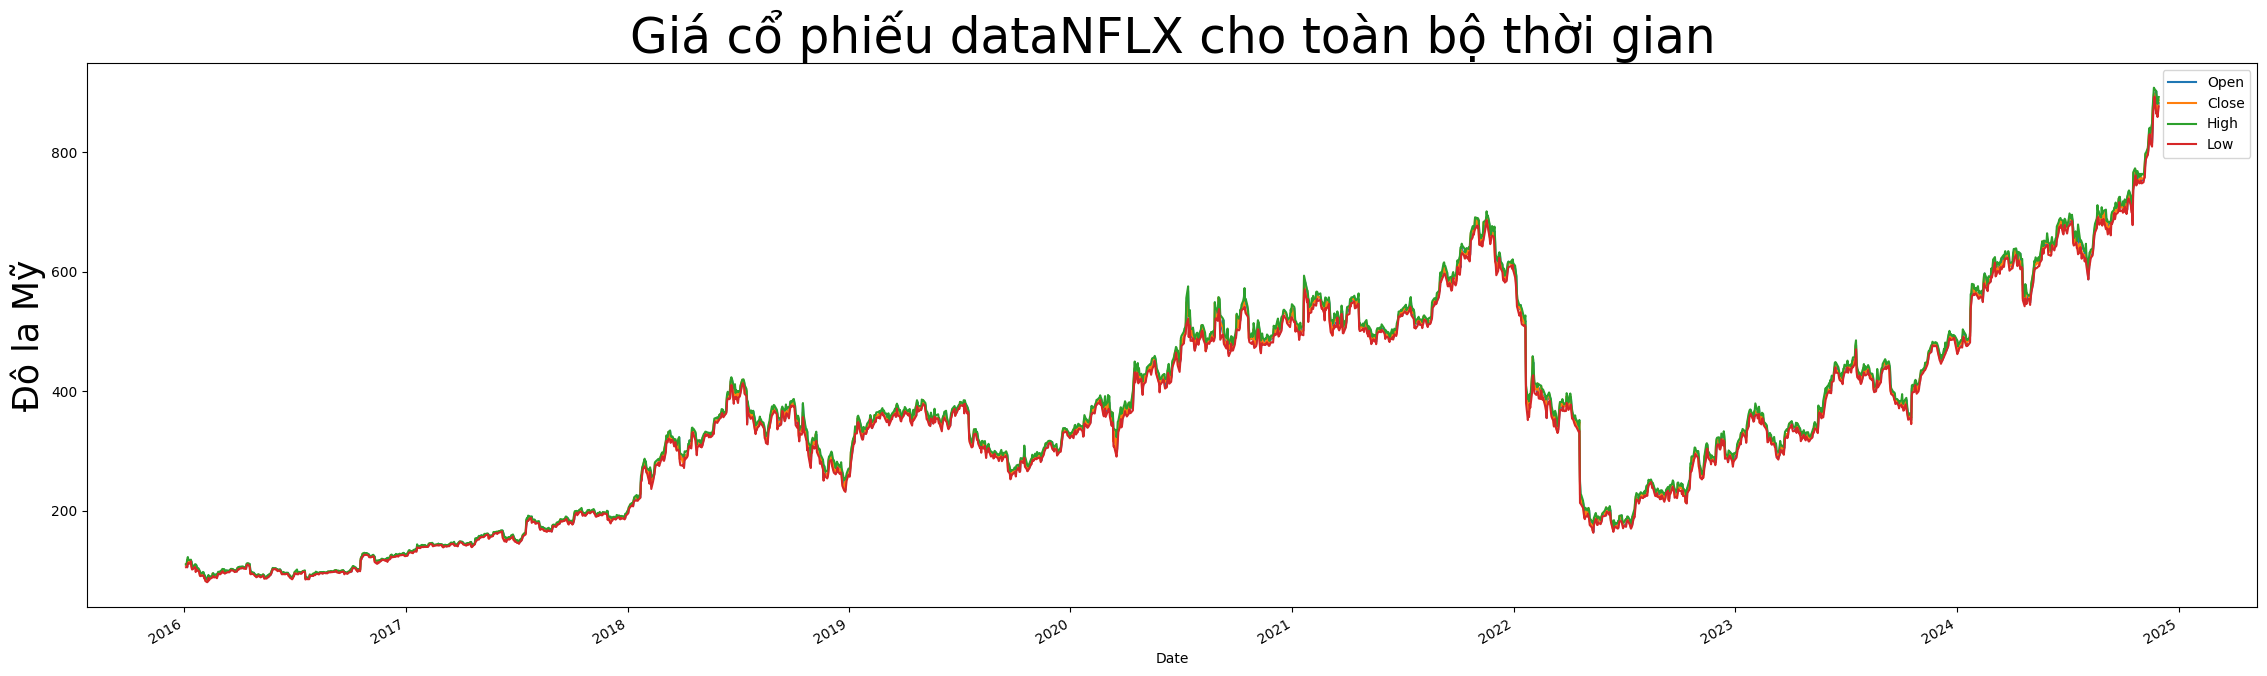

In [8]:
# Step 3: Plot the cleaned data for each ticker
for ticker in tickers:
    plot_stock_data(f"data{ticker}.csv")